In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from scipy import stats
import os


Import data

In [2]:
numbers_controls = range(19, 52)

# Dictionary to store DataFrames
dataframes_mid = {}

for i in numbers_controls:
    sub_control = f"sub-control{i:03d}"
    filename = f"featqueryreport_{sub_control}_ses-midcycle_brainstem.txt"
    filepath = os.path.join("C:\\Users\\beama\\OneDrive\\Documents\\uni\\4 ano\\Tese\\plots\\all_brainstem_reports", filename)
    if os.path.exists(filepath):
        dataframes_mid[f"control{i}_ses-midcycle"] = pd.read_csv(filepath, sep=" ", header=None)
        #print(f"Successfully read {filename}. Shape: {dataframes_mid[f'control{i}_{phase}'].shape}")
    else:
        #print(f"File {filename} not found. Skipping...")
        pass

print(len(dataframes_mid))

# Dictionary to store DataFrames
dataframes_premens = {}

for i in numbers_controls:
    sub_control = f"sub-control{i:03d}"
    filename = f"featqueryreport_{sub_control}_ses-premenstrual_brainstem.txt"
    filepath = os.path.join("C:\\Users\\beama\\OneDrive\\Documents\\uni\\4 ano\\Tese\\plots\\all_brainstem_reports", filename)
    if os.path.exists(filepath):
        dataframes_premens[f"control{i}_ses-premenstrual"] = pd.read_csv(filepath, sep=" ", header=None)
        #print(f"Successfully read {filename}. Shape: {dataframes_premens[f'control{i}_{phase}'].shape}")
    else:
        #print(f"File {filename} not found. Skipping...")
        pass

print(len(dataframes_premens))

15
15


In [3]:
numbers_patients = range(1, 53)

dataframes_int = {}

for i in numbers_patients:
    sub_patient = f"sub-patient{i:03d}"
    filename = f"featqueryreport_{sub_patient}_ses-interictal_brainstem.txt"
    filepath = os.path.join("C:\\Users\\beama\\OneDrive\\Documents\\uni\\4 ano\\Tese\\plots\\all_brainstem_reports", filename)
    if os.path.exists(filepath):
        dataframes_int[f"patient{i}_ses-interictal"] = pd.read_csv(filepath, sep=" ", header=None)
        #print(f"Successfully read {filename}. Shape: {dataframes_int[f'patient{i}_{phase}'].shape}")
    else:
        #print(f"File {filename} not found. Skipping...")
        pass

print(len(dataframes_int))

# Dictionary to store DataFrames
dataframes_preictal = {}

for i in numbers_patients:
    sub_patient = f"sub-patient{i:03d}"
    filename = f"featqueryreport_{sub_patient}_ses-preictal_brainstem.txt"
    filepath = os.path.join("C:\\Users\\beama\\OneDrive\\Documents\\uni\\4 ano\\Tese\\plots\\all_brainstem_reports", filename)
    if os.path.exists(filepath):
        dataframes_preictal[f"patient{i}_ses-preictal"] = pd.read_csv(filepath, sep=" ", header=None)
        #print(f"Successfully read {filename}. Shape: {dataframes_preictal[f'patient{i}_{phase}'].shape}")
    else:
        #print(f"File {filename} not found. Skipping...")
        pass

print(len(dataframes_preictal))

# Dictionary to store DataFrames
dataframes_ictal = {}

for i in numbers_patients:
    sub_patient = f"sub-patient{i:03d}"
    filename = f"featqueryreport_{sub_patient}_ses-ictal_brainstem.txt"
    filepath = os.path.join("C:\\Users\\beama\\OneDrive\\Documents\\uni\\4 ano\\Tese\\plots\\all_brainstem_reports", filename)
    if os.path.exists(filepath):
        dataframes_ictal[f"patient{i}_ses-ictal"] = pd.read_csv(filepath, sep=" ", header=None)
        #print(f"Successfully read {filename}. Shape: {dataframes_ictal[f'patient{i}_{phase}'].shape}")
    else:
        #print(f"File {filename} not found. Skipping...")
        pass

print(len(dataframes_ictal))

# Dictionary to store DataFrames
dataframes_postictal = {}

for i in numbers_patients:
    sub_patient = f"sub-patient{i:03d}"
    filename = f"featqueryreport_{sub_patient}_ses-postictal_brainstem.txt"
    filepath = os.path.join("C:\\Users\\beama\\OneDrive\\Documents\\uni\\4 ano\\Tese\\plots\\all_brainstem_reports", filename)
    if os.path.exists(filepath):
        dataframes_postictal[f"patient{i}_ses-postictal"] = pd.read_csv(filepath, sep=" ", header=None)
        #print(f"Successfully read {filename}. Shape: {dataframes_postictal[f'patient{i}_{phase}'].shape}")
    else:
        #print(f"File {filename} not found. Skipping...")
        pass

print(len(dataframes_postictal))

13
12
14
13


First plots (COPE8) and functions

In [4]:
def extract_values(dataframes, iloc_position):
    extracted_values = []
    for key in dataframes:
        extracted_values.append(dataframes[key].iloc[iloc_position[0], iloc_position[1]])
    return extracted_values

midcycle = extract_values(dataframes_mid, (0, 5))
premenstrual = extract_values(dataframes_premens, (0, 5))
interictal = extract_values(dataframes_int, (0, 5))
preictal = extract_values(dataframes_preictal, (0, 5))
ictal = extract_values(dataframes_ictal, (0, 5))
postictal = extract_values(dataframes_postictal, (0, 5))

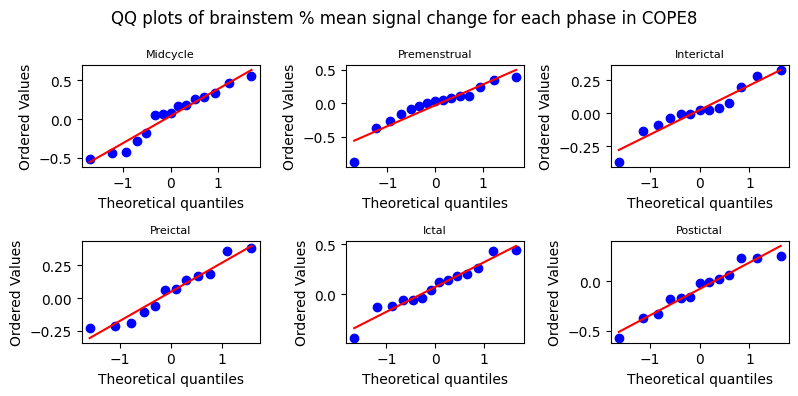

In [5]:
# qq plot of each phase

fig, axs = plt.subplots(2, 3, figsize=(8, 4))
fig.suptitle("QQ plots of brainstem % mean signal change for each phase in COPE8")

stats.probplot(midcycle, dist="norm", plot=axs[0, 0])
axs[0, 0].set_title("Midcycle", fontsize=8)

stats.probplot(premenstrual, dist="norm", plot=axs[0, 1])
axs[0, 1].set_title("Premenstrual", fontsize=8)

stats.probplot(interictal, dist="norm", plot=axs[0, 2])
axs[0, 2].set_title("Interictal", fontsize=8)

stats.probplot(preictal, dist="norm", plot=axs[1, 0])
axs[1, 0].set_title("Preictal", fontsize=8)

stats.probplot(ictal, dist="norm", plot=axs[1, 1])
axs[1, 1].set_title("Ictal", fontsize=8)

stats.probplot(postictal, dist="norm", plot=axs[1, 2])
axs[1, 2].set_title("Postictal", fontsize=8)

plt.tight_layout()
plt.show()

In [6]:
# test for significance

midvsinter8 = stats.ttest_ind(midcycle, interictal)
premensvspreict8 = stats.ttest_ind(premenstrual, preictal)
premensvsict8 = stats.ttest_ind(premenstrual, ictal)
premensvspostict8 = stats.ttest_ind(premenstrual, postictal)
midvspremens8 = stats.ttest_rel(midcycle, premenstrual)

print("Midcycle vs Interictal unpaired t-test for COPE8: ",midvsinter8)
print("Premenstrual vs Preictal unpaired t-test for COPE8: ",premensvspreict8)
print("Premenstrual vs Ictal unpaired t-test for COPE8: ",premensvsict8)
print("Premenstrual vs Postictal unpaired t-test for COPE8: ",premensvspostict8)
print("Midcycle vs Premenstrual paired t-test for COPE8: ",midvspremens8)



Midcycle vs Interictal unpaired t-test for COPE8:  TtestResult(statistic=0.14108293174189915, pvalue=0.88889184950705, df=26.0)
Premenstrual vs Preictal unpaired t-test for COPE8:  TtestResult(statistic=-0.7101873879862066, pvalue=0.48416054491019644, df=25.0)
Premenstrual vs Ictal unpaired t-test for COPE8:  TtestResult(statistic=-0.9573105396826651, pvalue=0.34690459348561753, df=27.0)
Premenstrual vs Postictal unpaired t-test for COPE8:  TtestResult(statistic=0.44357669371545944, pvalue=0.6610181331268431, df=26.0)
Midcycle vs Premenstrual paired t-test for COPE8:  TtestResult(statistic=0.56342672078654, pvalue=0.582056925044129, df=14)


In [7]:
def plot_boxplot_with_significance(data, ROIname, COPEname, significance_tests):
    """
    Plot a boxplot with significance markers.

    Args:
        data (list): List of data arrays for boxplot.
        ROIname (string): Name of the ROI.
        COPEname (string): Name of the COPE.
        significance_tests (list of tuples): List of tuples containing significance test results.

    Returns:
        None
    """
    positions = [1, 2, 3, 4, 5, 6]
    phase_names = ['Midcycle', 'Premenstrual', 'Interictal', 'Preictal', 'Ictal', 'Postictal']

    # Create the boxplot with equal width
    boxprops_green = dict(color="lightgreen", facecolor="lightgreen", linewidth=2)
    boxprops_red = dict(color="lightcoral", facecolor="lightcoral", linewidth=2)
    medianprops_black = dict(color="black", linewidth=2)

    plt.boxplot(data[:-2], positions=positions[:-2], patch_artist=True, boxprops=boxprops_green, medianprops=medianprops_black, widths=0.5)
    plt.boxplot(data[-4:], positions=positions[-4:], patch_artist=True, boxprops=boxprops_red, medianprops=medianprops_black, widths=0.5)

    # Set x-axis labels
    plt.xticks(positions, phase_names, fontsize=8)

    # Add significance markers
    max_value = max(max(data[0]), max(data[1]), max(data[2]), max(data[3]), max(data[4]), max(data[5]))
    offset = 0.02

    for i, test_result in enumerate(significance_tests):
        if test_result[1].pvalue < 0.05:
            plt.hlines(max_value + offset, positions[test_result[0][0]], positions[test_result[0][1]], color='black', linewidth=2)
            plt.text((positions[test_result[0][0]] + positions[test_result[0][1]]) * 0.5, max_value + (i+1) * offset, '*', ha='center', va='bottom', fontsize=16)

    plt.ylabel('Mean % signal change')
    plt.title(f'Mean % signal change for {COPEname} in the {ROIname} (stats map)')
    plt.show()



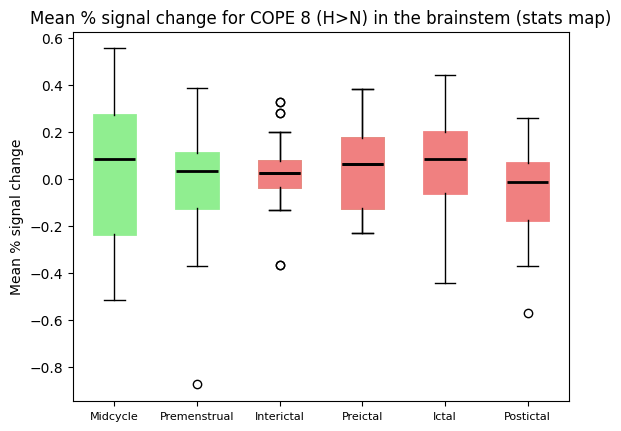

In [8]:
data = [midcycle, premenstrual, interictal, preictal, ictal, postictal]
significance_tests = [((0, 2), midvsinter8), ((1, 3), premensvspreict8), ((1, 4), premensvsict8), ((1, 5), premensvspostict8), ((0, 1), midvspremens8)] # first position in the tuple is the phases being compared (so the function knows where to draw the line), second position is the t-test result

plot_boxplot_with_significance(data, 'brainstem', "COPE 8 (H>N)", significance_tests)


In [9]:
midcycle_thr = extract_values(dataframes_mid, (3, 5))
premenstrual_thr = extract_values(dataframes_premens, (3, 5))
interictal_thr = extract_values(dataframes_int, (3, 5))
preictal_thr = extract_values(dataframes_preictal, (3, 5))
ictal_thr = extract_values(dataframes_ictal, (3, 5))
postictal_thr = extract_values(dataframes_postictal, (3, 5))

In [10]:
def plot_boxplot(data, ROIname, COPEname):
    """
    Plot a boxplot with significance markers.

    Args:
        data (list): List of data arrays for boxplot.
        ROIname (string): Name of the ROI.

    Returns:
        None
    """
    positions = [1, 2, 3, 4, 5, 6]
    phase_names = ['Midcycle', 'Premenstrual', 'Interictal', 'Preictal', 'Ictal', 'Postictal']

    # Create the boxplot with equal width
    boxprops_green = dict(color="lightgreen", facecolor="lightgreen", linewidth=2)
    boxprops_red = dict(color="lightcoral", facecolor="lightcoral", linewidth=2)
    medianprops_black = dict(color="black", linewidth=2)

    plt.boxplot(data[:-2], positions=positions[:-2], patch_artist=True, boxprops=boxprops_green, medianprops=medianprops_black, widths=0.5)
    plt.boxplot(data[-4:], positions=positions[-4:], patch_artist=True, boxprops=boxprops_red, medianprops=medianprops_black, widths=0.5)

    # Set x-axis labels
    plt.xticks(positions, phase_names, fontsize=8)

    plt.ylabel('Mean % signal change')
    plt.title(f'Mean % signal change for {COPEname} in the {ROIname} (thresh_ztat map)')
    plt.show()

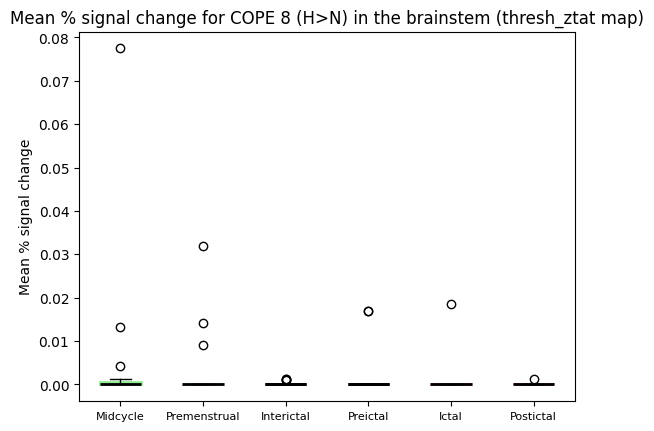

In [11]:
data = [midcycle_thr, premenstrual_thr, interictal_thr, preictal_thr, ictal_thr, postictal_thr]

plot_boxplot(data, 'brainstem', "COPE 8 (H>N)")

COPE9

In [12]:
midcycle9 = extract_values(dataframes_mid, (1, 5))
premenstrual9 = extract_values(dataframes_premens, (1, 5))
interictal9 = extract_values(dataframes_int, (1, 5))
preictal9 = extract_values(dataframes_preictal, (1, 5))
ictal9 = extract_values(dataframes_ictal, (1, 5))
postictal9 = extract_values(dataframes_postictal, (1, 5))

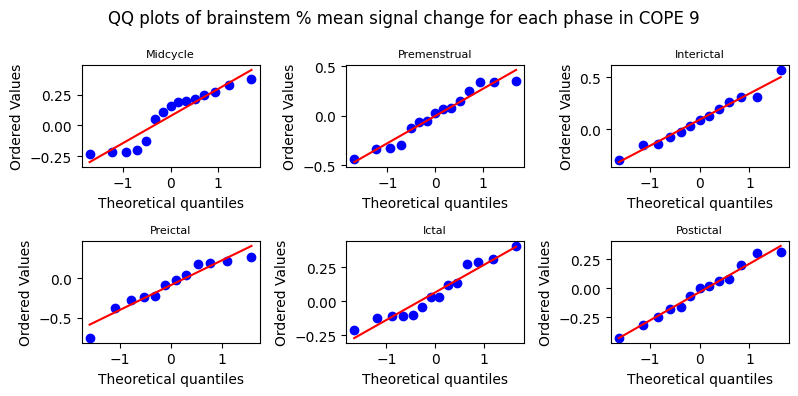

In [13]:
# qq plot of each phase

fig, axs = plt.subplots(2, 3, figsize=(8, 4))
fig.suptitle("QQ plots of brainstem % mean signal change for each phase in COPE 9")

stats.probplot(midcycle9, dist="norm", plot=axs[0, 0])
axs[0, 0].set_title("Midcycle", fontsize=8)
stats.probplot(premenstrual9, dist="norm", plot=axs[0, 1])
axs[0, 1].set_title("Premenstrual", fontsize=8)
stats.probplot(interictal9, dist="norm", plot=axs[0, 2])
axs[0, 2].set_title("Interictal", fontsize=8)
stats.probplot(preictal9, dist="norm", plot=axs[1, 0])
axs[1, 0].set_title("Preictal", fontsize=8)
stats.probplot(ictal9, dist="norm", plot=axs[1, 1])
axs[1, 1].set_title("Ictal", fontsize=8)
stats.probplot(postictal9, dist="norm", plot=axs[1, 2])
axs[1, 2].set_title("Postictal", fontsize=8)

plt.tight_layout()
plt.show()

In [14]:
midvsinter9 = stats.ttest_ind(midcycle9, interictal9)
premensvspreict9 = stats.ttest_ind(premenstrual9, preictal9)
premensvsict9 = stats.ttest_ind(premenstrual9, ictal9)
premensvspostict9 = stats.ttest_ind(premenstrual9, postictal9)
midvspremens9 = stats.ttest_rel(midcycle9, premenstrual9)

print("Midcycle vs Interictal unpaired t-test for COPE9: ",midvsinter9)
print("Premenstrual vs Preictal unpaired t-test for COPE9: ",premensvspreict9)
print("Premenstrual vs Ictal unpaired t-test for COPE9: ",premensvsict9)
print("Premenstrual vs Postictal unpaired t-test for COPE9: ",premensvspostict9)
print("Midcycle vs Premenstrual paired t-test for COPE9: ",midvspremens9)

Midcycle vs Interictal unpaired t-test for COPE9:  TtestResult(statistic=-0.18088623798342496, pvalue=0.8578595244736187, df=26.0)
Premenstrual vs Preictal unpaired t-test for COPE9:  TtestResult(statistic=0.8239996570282384, pvalue=0.417731998325627, df=25.0)
Premenstrual vs Ictal unpaired t-test for COPE9:  TtestResult(statistic=-0.7638754499260332, pvalue=0.45156557718214885, df=27.0)
Premenstrual vs Postictal unpaired t-test for COPE9:  TtestResult(statistic=0.3493579144086194, pvalue=0.7296344023558365, df=26.0)
Midcycle vs Premenstrual paired t-test for COPE9:  TtestResult(statistic=0.741813983493997, pvalue=0.4704625669653345, df=14)


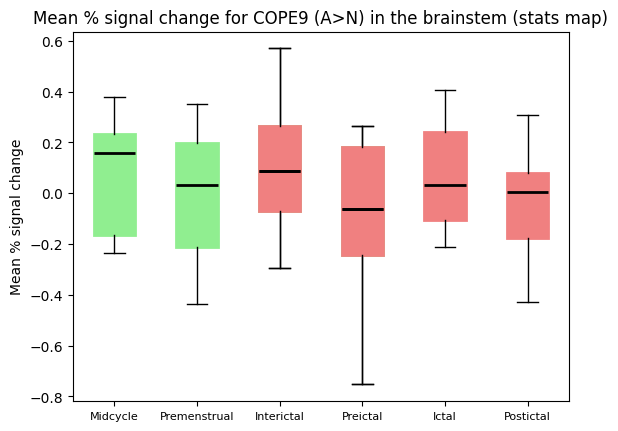

In [15]:
data = [midcycle9, premenstrual9, interictal9, preictal9, ictal9, postictal9]
significance_tests = [((0, 2), midvsinter8), ((1, 3), premensvspreict8), ((1, 4), premensvsict8), ((1, 5), premensvspostict8), ((0, 1), midvspremens8)]

plot_boxplot_with_significance(data, 'brainstem', 'COPE9 (A>N)', significance_tests)

In [16]:
midcycle_thr9 = extract_values(dataframes_mid, (4, 5))
premenstrual_thr9 = extract_values(dataframes_premens, (4, 5))
interictal_thr9 = extract_values(dataframes_int, (4, 5))
preictal_thr9 = extract_values(dataframes_preictal, (4, 5))
ictal_thr9 = extract_values(dataframes_ictal, (4, 5))
postictal_thr9 = extract_values(dataframes_postictal, (4, 5))

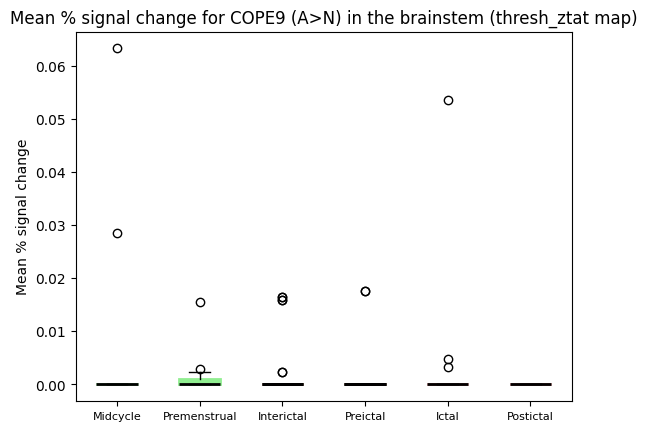

In [17]:
data = [midcycle_thr9, premenstrual_thr9, interictal_thr9, preictal_thr9, ictal_thr9, postictal_thr9]

plot_boxplot(data, 'brainstem', 'COPE9 (A>N)')

COPE10

In [18]:
midcycle10 = extract_values(dataframes_mid, (2, 5))
premenstrual10 = extract_values(dataframes_premens, (2, 5))
interictal10 = extract_values(dataframes_int, (2, 5))
preictal10 = extract_values(dataframes_preictal, (2, 5))
ictal10 = extract_values(dataframes_ictal, (2, 5))
postictal10 = extract_values(dataframes_postictal, (2, 5))


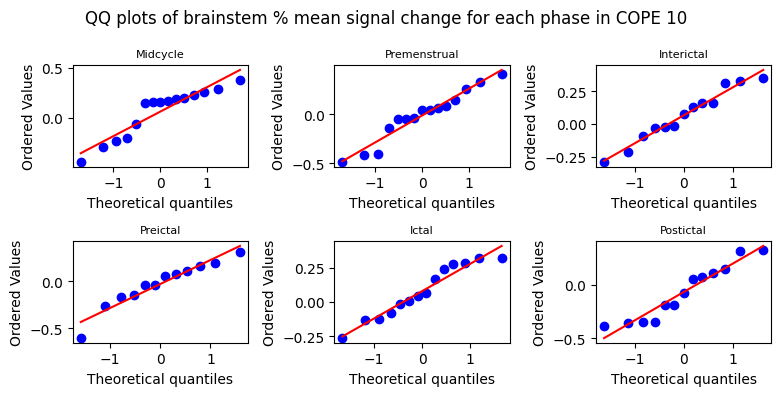

In [19]:
# qq plot of each phase

fig, axs = plt.subplots(2, 3, figsize=(8, 4))
fig.suptitle("QQ plots of brainstem % mean signal change for each phase in COPE 10")

stats.probplot(midcycle10, dist="norm", plot=axs[0, 0])
axs[0, 0].set_title("Midcycle", fontsize=8)
stats.probplot(premenstrual10, dist="norm", plot=axs[0, 1])
axs[0, 1].set_title("Premenstrual", fontsize=8)
stats.probplot(interictal10, dist="norm", plot=axs[0, 2])
axs[0, 2].set_title("Interictal", fontsize=8)
stats.probplot(preictal10, dist="norm", plot=axs[1, 0])
axs[1, 0].set_title("Preictal", fontsize=8)
stats.probplot(ictal10, dist="norm", plot=axs[1, 1])
axs[1, 1].set_title("Ictal", fontsize=8)
stats.probplot(postictal10, dist="norm", plot=axs[1, 2])
axs[1, 2].set_title("Postictal", fontsize=8)

plt.tight_layout()
plt.show()

In [20]:
# test for significance

midvsinter10 = stats.ttest_ind(midcycle10, interictal10)
premensvspreict10 = stats.ttest_ind(premenstrual10, preictal10)
premensvsict10 = stats.ttest_ind(premenstrual10, ictal10)
premensvspostict10 = stats.ttest_ind(premenstrual10, postictal10)
midvspremens10 = stats.ttest_rel(midcycle10, premenstrual10)

print("Midcycle vs Interictal unpaired t-test for COPE10: ",midvsinter10)
print("Premenstrual vs Preictal unpaired t-test for COPE10: ",premensvspreict10)
print("Premenstrual vs Ictal unpaired t-test for COPE10: ",premensvsict10)
print("Premenstrual vs Postictal unpaired t-test for COPE10: ",premensvspostict10)
print("Midcycle vs Premenstrual paired t-test for COPE10: ",midvspremens10)

Midcycle vs Interictal unpaired t-test for COPE10:  TtestResult(statistic=-0.016505907974701722, pvalue=0.9869568009517843, df=26.0)
Premenstrual vs Preictal unpaired t-test for COPE10:  TtestResult(statistic=0.15616718332943272, pvalue=0.8771554767666245, df=25.0)
Premenstrual vs Ictal unpaired t-test for COPE10:  TtestResult(statistic=-1.0910547397722723, pvalue=0.2848899797968082, df=27.0)
Premenstrual vs Postictal unpaired t-test for COPE10:  TtestResult(statistic=0.5250860932976454, pvalue=0.6039726107100055, df=26.0)
Midcycle vs Premenstrual paired t-test for COPE10:  TtestResult(statistic=0.795441810390836, pvalue=0.4396353475187703, df=14)


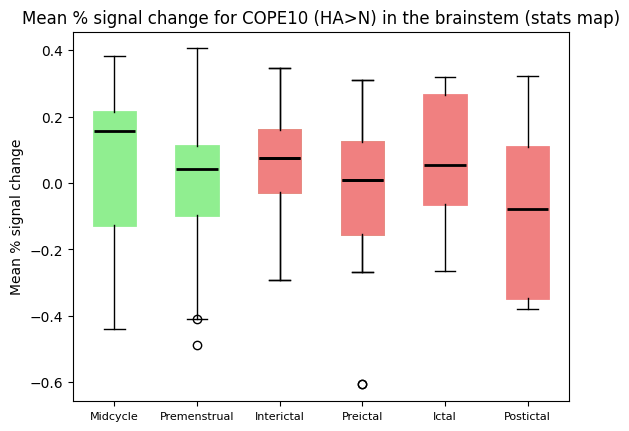

In [21]:
data = [midcycle10, premenstrual10, interictal10, preictal10, ictal10, postictal10]
significance_tests = [((0, 2), midvsinter10), ((1, 3), premensvspreict10), ((1, 4), premensvsict10), ((1, 5), premensvspostict10), ((0, 1), midvspremens10)]

plot_boxplot_with_significance(data, 'brainstem', 'COPE10 (HA>N)', significance_tests)

In [22]:
midcycle_thr10 = extract_values(dataframes_mid, (5, 5))
premenstrual_thr10 = extract_values(dataframes_premens, (5, 5))
interictal_thr10 = extract_values(dataframes_int, (5, 5))
preictal_thr10 = extract_values(dataframes_preictal, (5, 5))
ictal_thr10 = extract_values(dataframes_ictal, (5, 5))
postictal_thr10 = extract_values(dataframes_postictal, (5, 5))

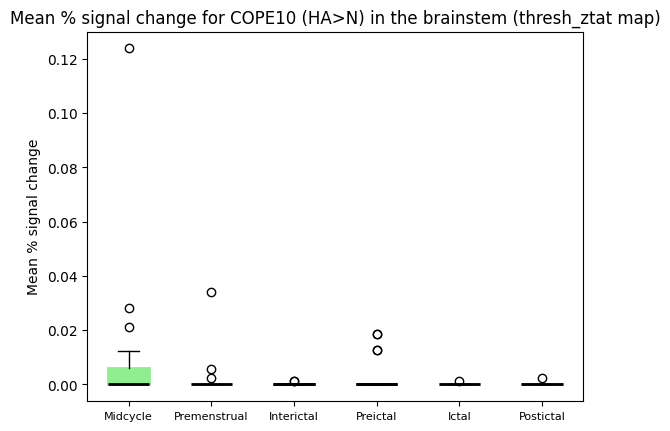

In [23]:
data = [midcycle_thr10, premenstrual_thr10, interictal_thr10, preictal_thr10, ictal_thr10, postictal_thr10]

plot_boxplot(data, 'brainstem', 'COPE10 (HA>N)')